<a href="https://colab.research.google.com/github/mayank-patidar/Disease-Risk-Factors-Prediction/blob/main/Statistics_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics Project (Spring 2021)
**Mayank Patidar - map20016**

In [ ]:
version # make sure it says language R at the bottom!

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             

# Install and Load Required Packages

In [ ]:
install.packages(c("corrplot","ggplot2"))
library("corrplot")
library("ggplot2")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# External Data Joining

In [ ]:
Places = read.csv("/content/PLACES_county_cleanheader.csv", check.names = FALSE)
dim(Places) #Checking count of rows and columns of the places dataset

[1] 3142   30

In [ ]:
US_Regions = read.csv("/content/us census bureau regions and divisions.csv", check.names = FALSE)
dim(US_Regions) #Checking count of rows and columns of the region dataset
colnames(Places)[1] <- "State Code" # Rename State Abbrevation column to merge place and region dataset
df_merge = merge(Places,US_Regions,by="State Code")
write.csv(df_merge, file = "merged_file.csv")


[1] 51  4

In [ ]:
#Checking count of rows and columns of the merged dataset
dim(df_merge)

[1] 3142   33

In [ ]:
# Subset the main dataframe
temp = subset(df_merge, 
              select = c("State Code"	,"LocationName",	"State",	"Region",	"Division",
                          "Coronary heart disease among adults aged >=18 years",
                          "High blood pressure among adults aged >=18 years",	
                          "High cholesterol among adults aged >=18 years who have been screened in the past 5 years", 
                          "Cholesterol screening among adults aged >=18 years" ,	
                          "Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure" , 
 	                        "Binge drinking among adults aged >=18 years", 
   	                      "Current smoking among adults aged >=18 years", 	
                          "Obesity among adults aged >=18 years", 
                          "No leisure-time physical activity among adults aged >=18 years",
                          "Sleeping less than 7 hours among adults aged >=18 years",
                          "Visits to doctor for routine checkup within the past year among adults aged >=18 years"
                          )
              )

In [ ]:
# Rename the columns in the subset
temp = setNames(df_merge, 
                c(
                  "State_code",
                  "Loc_Name",   
                  "teeth_loss",
                  "Arthritis", 
                  "drinking", 
                  "cancer", 
                  "cer_cancer_screen", 
                  "ch_screen", 
                  "chronic_disease", 
                  "chronic_obs_pul", 
                  "CHD", 
                  "Asthama", 
                  "lack_health_ins",
                  "smoking",
                  "diabetes", 
                  "Fecal_blood_test", 
                  "HBP", 
                  "HCH", 
                  "mammography", 
                  "mental_health", 
                  "no_leisure", 
                  "obesity", 
                  "old_adult_men",
                  "old_adult_women", 
                  "physical_health",
                  "not_sleeping", 
                  "stroke", 
                  "med_HBP", 
                  "dentist_visit", 
                  "doc_visit", 
                  "State", 
                  "Region", 
                  "Division" 
                  )
                )

# Exploratory Data Analysis

## Table 1 - Health Outcome

In [ ]:
# Subset 'temp' dataframe to extract all the health outcomes to determine the highest impact of health outcomes in the US. 
health_outcome = subset(temp , 
                        select = c(
                                    teeth_loss, 
                                    Arthritis, 
                                    cancer, 
                                    chronic_disease, 
                                    chronic_obs_pul, 
                                    CHD,
                                    Asthama, 
                                    diabetes, 
                                    HBP, 
                                    HCH, 
                                    mental_health, 
                                    physical_health, 
                                    stroke
                                  )
                          )

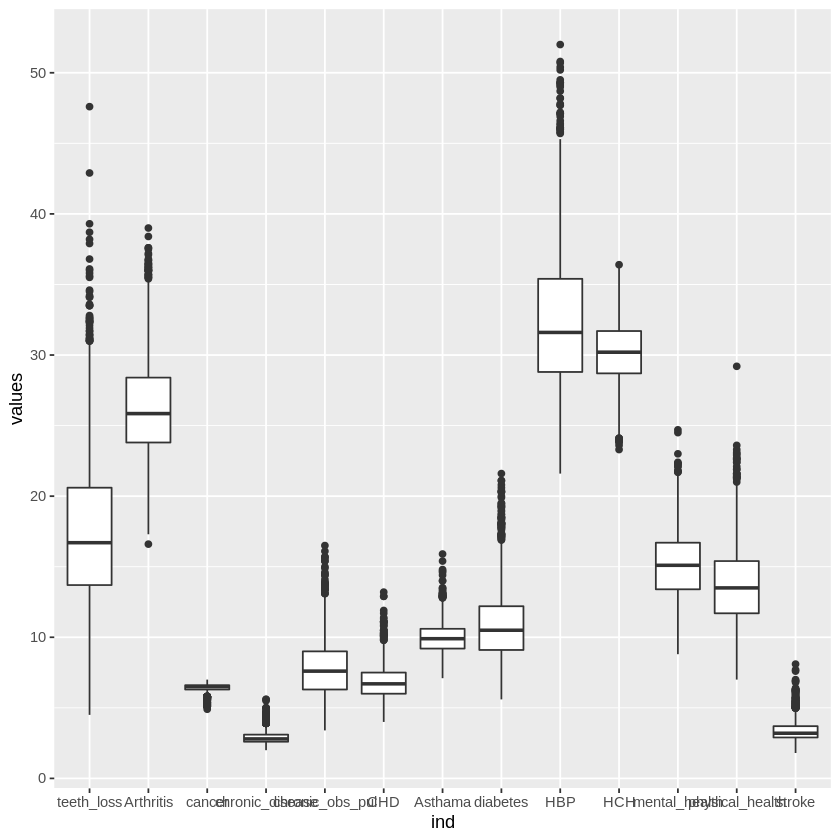

In [ ]:
# Create individual boxplots for each health outcome
ggplot(stack(health_outcome), aes(x = ind, y = values)) +
geom_boxplot()

**From the above plot, we can say that High Blood Pressure is most prevalent amongst the other health outcomes in the US**

## Table 2 - High Blood Pressure

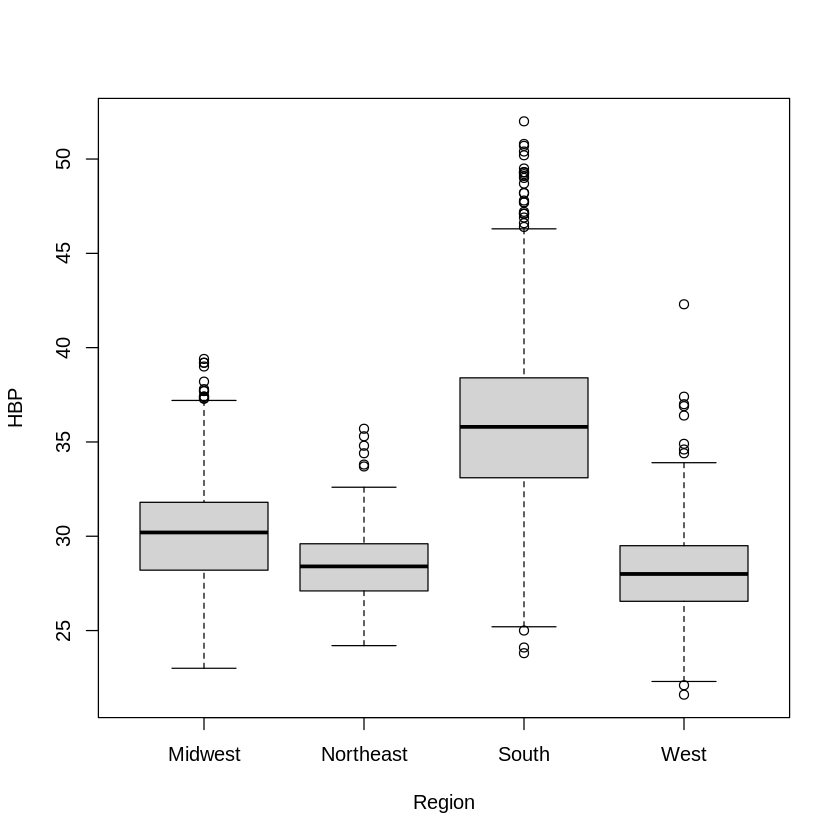

In [ ]:
# High Blood Pressure has the highest median. Hence, we selected High Blood Pressure for the further analysis.
# Check which region is the most impacted with High Blood Pressure issues.

boxplot( HBP ~ Region, data = temp) # Create a boxplot for the same

**We see that South is the highest affected region whereas West is the lowest affected region.**

## Table 3 - Factors affecting High Blood Pressure

In [ ]:
HBP_Corr = subset(temp, 
                  select = c(
                              HBP, 
                              drinking, 
                              smoking, 
                              obesity, 
                              not_sleeping, 
                              med_HBP
                            )
                  ) # Subset the dataframe
cor(HBP_Corr) # Determine the correlation

,HBP,drinking,smoking,obesity,not_sleeping,med_HBP
HBP,1.0000000,-0.6785105,0.6761055,0.7139642,0.7746611,0.8110757
drinking,-0.6785105,1.0000000,-0.3290419,-0.3234388,-0.6442544,-0.4766185
smoking,0.6761055,-0.3290419,1.0000000,0.6240325,0.6463071,0.5499420
obesity,0.7139642,-0.3234388,0.6240325,1.0000000,0.5295514,0.6534702
not_sleeping,0.7746611,-0.6442544,0.6463071,0.5295514,1.0000000,0.6627992
med_HBP,0.8110757,-0.4766185,0.5499420,0.6534702,0.6627992,1.0000000


**Looking at the above correlation table, we see that High Blood Pressure has the highest correlation of 0.774661 with not_sleeping variable.**

## Table 4 - Analyzing High Blood Pressure Data for South region.

In [ ]:
# Filter the data region wise
south_region = temp[temp$Region == "South",]

**As south region has the highest impact of high blood pressure, we dived further into the state level of South region for the analysis**

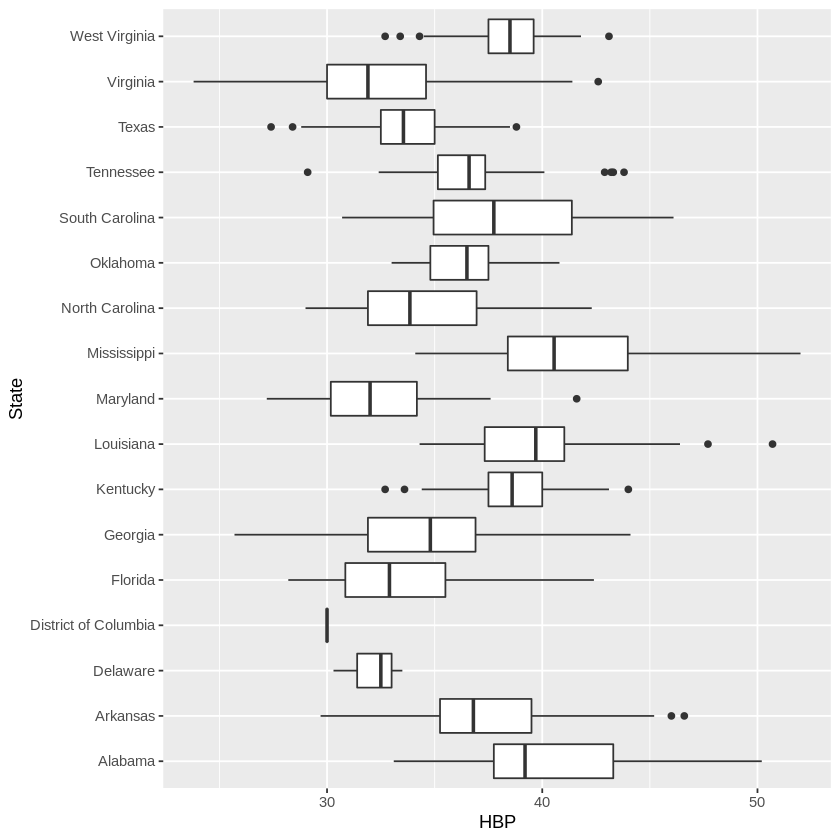

In [ ]:
# Plot for South Region
ggplot(south_region, aes(x=HBP, y=State), ) +
  geom_boxplot()

**From the above plot, we can see that Mississippi is the highest affected state in terms of High Blood Pressure.**

## Table 5 - Analyzing High Blood Pressure Data for West region.

**As west region has the lowest impact of high blood pressure, we dived further into the state level of west region for the analysis**

In [ ]:
West_region = temp[temp$Region == "West",]

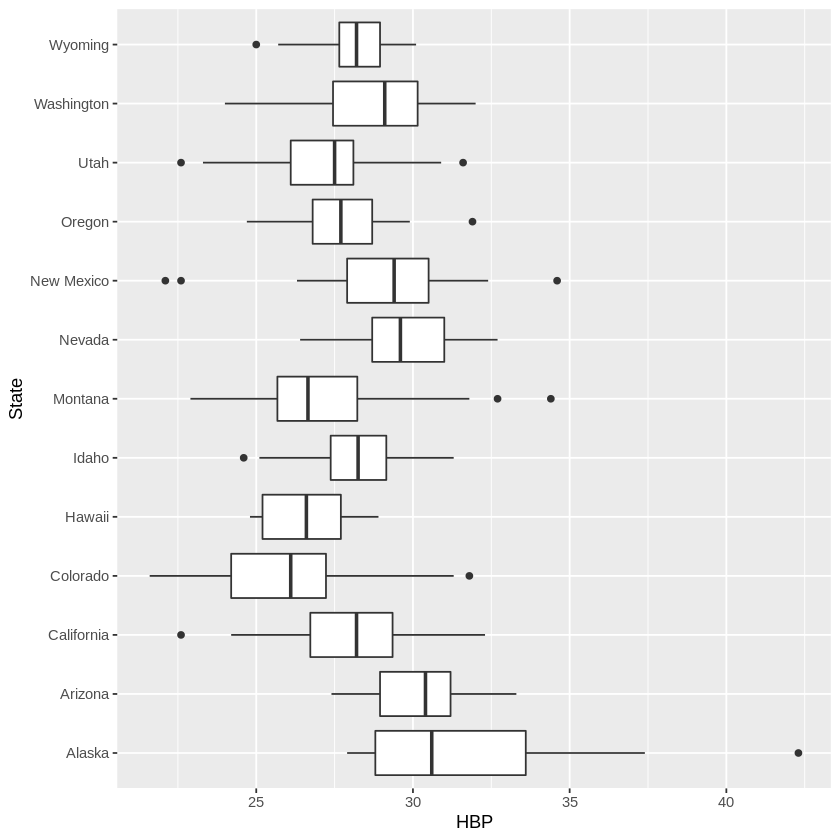

In [ ]:
# Plot for West region
ggplot(West_region, aes(x=HBP, y=State)) +
geom_boxplot()

**From the above plot, we can see that Colorado is the least affected state in terms of High Blood Pressure.**

# Literature Review

After exploring the dataset, we have found some interesting relations between the variables. For doing Hypothesis testing and proceeding further with the project it is important to understand the trends that are associated with our target variable. We are going forward with “**High Blood Pressure (HBP)**” as our target variable to find relevant findings. According to the American heart association, high blood pressure (also referred to as HBP, or hypertension) is the condition when our blood pressure, the force of blood flowing through our blood vessels, is consistently too high [1].

<br>

As per the Harvard health survey, for decades, HBP was defined as 140/90(140 over 90). In November 2017, new United States guidelines lowered the threshold for diagnosing the condition. According to new guidelines, anyone with a reading of 130/80 or higher has blood pressure. Based on this new definition, nearly half of Americans now fall into this group [2]. Blood pressure is now categorized as Normal for less than 120/80, Elevated for 120/80 to 129/79, Stage 1 of Hypertension for 130/80 to 139/89, and Stage 2 of Hypertension for more than 140/90 mm Hg. There is one more category for blood pressure higher than 180 as Hypertensive crisis, it is suggested to immediately consider a doctor if someone is having this higher blood pressure [1].

![picture](https://www.heart.org/-/media/images/health-topics/high-blood-pressure/rainbow-chart/blood-pressure-readings-chart.jpg)

<br>

After understanding the levels of hypertension, we can now start exploring and analyzing the overall trends, preventability, effect on a certain community, available medication, and the pandemic's effect on HBP.

<br>

Having hypertension can put an individual at risk for heart disease and stroke, which are leading causes of death in the United States. In 2018, nearly half a million deaths in the United States included hypertension as a primary or contributing cause [3]. Nearly half of adults in the United States (108 million, or 45%) have hypertension defined as an HBP ≥ 130 are taking medication for hypertension. Further, the facts concluded that about 1 in 4 adults (24%) with hypertension in the US have their condition under control. About half of adults (45%) with uncontrolled hypertension have a blood pressure of 140/90 or higher. This includes 37 million U.S. adults. 
High blood pressure was a primary cause of death for more than 494,873 people in the United States in 2018 [3]. High blood pressure costs the United States about $131 billion each year, averaged over 12 years from 2003 to 2014. 

<br>

Looking at the concerning figures of death caused by HBP, several organizations and governments are working to make people aware of Hypertension. A recent finding published online indicates that the proportion of U.S. adults with hypertension who were aware they had hypertension and had controlled blood pressure declined between 2013-2014 and 2017-2018 [4]. The results of this survey are concerning, according to the survey the proportion of U.S. adults with hypertension who were aware they had hypertension increased from 70% in 1999-2000 to 85% in 2013-2014 before declining to 77% in 2017-2018 [4]. The survey also reported that those between the ages of 60 and 74 and those over 75 were less likely to have controlled blood pressure than those 18-44 years old. 

<br>

Despite being one of the most common and widespread diseases in the United States, hypertension is also one of the most preventable. A person's risk of having high blood pressure over their lifespan is influenced by a variety of factors. Our age, a family history of hypertension, and ethnicity are among the hypertension risk factors that are out of our control. When it comes to preventing high blood pressure, the idea is to focus on the risk factors that we can change [5].
To avoid a hypertension diagnosis, one should make the following healthy lifestyle choices:
<br>

* Maintain a healthy weight.
* Eat a balanced diet
* Cut back on salt.
* Exercise regularly. 
* Limit alcohol usage.
* Manage stress. 
* Monitor your blood pressure regularly. 

<br>

Adopting these lifestyle changes can help us to prevent high blood pressure. Making an effort to prevent high blood pressure, will benefit to reduce the risk of heart attack, stroke, and other serious illnesses. One of the major concerns with Hypertension is the formal behavior of an individual towards HBP, if a person is suffering and he/she is not taking the doctor’s advice or following the suggested lifestyle changes, the damages could be life-threatening [6]. With proper treatment and management, one can control blood pressure to live a long and healthy life. The only step we should take is to follow a healthy lifestyle and consulting a doctor at the right time.

<br>

It may seem insignificant, but certain individuals are more likely to have a high blood pressure problem than others due to their family background or demographic group. The Data from the National Health and Nutrition Examination Survey suggests that the prevalence of hypertension was higher among non-Hispanic blacks (57.1%) than among non-Hispanic whites (43.6%) and Hispanics (43.7%) [7]. Among men, the age-adjusted prevalence of hypertension was higher among non-Hispanic blacks (57.2%) than non-Hispanic whites (50.2%) and Hispanic (50.1%) adults. Among women, the age-adjusted prevalence of hypertension was higher among non-Hispanic blacks (56.7%) than non-Hispanic whites (36.7%) and Hispanic (36.8%) adults [7]. This study results can be seen from the graphical description below:

<br>

![picture](https://www.cdc.gov/nchs/images/databriefs/351-400/db364-fig2.png)

<br>

Alone this study was not able to show the proper explanations on why the prevalence of hypertension was higher among non-Hispanic blacks. The research from Daniel T. Lackland addresses certain causes that may be correlated with this racial imbalance, such as salt exposure and obesity; this means that African Americans have a much higher susceptibility to salt consumption (which has a greater impact on Hypertension) and suffer from obesity more than other races, all of which affect blood pressure [8].

<br>

We can easily differentiate the level of severity in different states of the United States from the data available on some of the government websites. As per the data of 2019 from the website of “State of childhood obesity”, the most recent Behavioral Risk Factor Surveillance System (BRFSS) finds that nine of the 10 states with the highest rates of hypertension in the United States are in the South. West Virginia and Mississippi are the top ranked states (43.8% and 43.6%), and Alabama is the 3rd state with 42.5% of people facing HBP [9].

<br>

![picture](https://sites.psu.edu/eworkingernutr360/files/2017/03/hypertension_0-1xai07n.png)

<br>

Several types of research have been done on how to mitigate the risk and effect of High blood pressure on an individual. Fewer than half of those people with high blood pressure have it under control. But when the condition is detected early and treated properly, the outlook is good.
Sometimes high blood pressure can be treated solely through lifestyle changes, which are the first line of defense. In other cases, treatment requires both a healthy lifestyle and medications[10]. Some supplements may help to lower blood pressure, however, more research is needed to determine the potential benefits. These supplements include:

* Fiber, such as blond psyllium and wheat bran
* Minerals, such as magnesium, calcium and potassium
* Folic acid
* Supplements or products that increase nitric oxide or widen blood vessels (vasodilators), such as cocoa, coenzyme Q10, L-arginine and garlic
* Omega-3 fatty acids, found in fatty fish, high-dose fish oil supplements and flaxseed

In a recent clinical trial led by researchers from the George Institute for Global Health with branches in the United Kingdom, Australia, and India, they tested the effectiveness and safety of using an innovative drug for the treatment of high blood pressure or hypertension. This drug, nicknamed the “triple pill” by the investigators, combines low doses of three existing drugs for blood pressure [11]. Namely, these are telmisartan (20 milligrams), amlodipine (2.5 milligrams), and chlorthalidone (12.5 milligrams). This new combination drug may have the potential to revolutionize hypertension treatment worldwide, the 1st clinical trial has declared it safe to use and very effective [11].

<br>

We are currently in the middle of a pandemic due to the spread of the new coronavirus, researchers are working to learn more about health conditions that may put us at risk for serious illness. One of the conditions being investigated is high blood pressure [12]. A recent study investigated more than 2,800 hospitalized individuals with confirmed COVID-19 in China. Investigators made the following observations related to high blood pressure:

* Out of all study participants, 29.5 percent had high blood pressure. Of those with high blood pressure, 83.5 percent were taking medications to manage their condition.

* There was a twofold increase in the risk of death due to COVID-19 in people with high blood pressure when compared to those without high blood pressure.

* Those with high blood pressure who weren’t taking medications to manage their condition were at a greater risk for death compared to those who took blood pressure medications.

After this research CDC has recently updated its list of factors that put an individual at increased risk for serious illness due to COVID-19 and Hypertension is one among these factors. Analysis of early data from different countries shows that high blood pressure is the most commonly shared pre-existing condition among those hospitalized, affecting between 30% to 50% of the patients. Other health conditions included cancer, diabetes, or lung disease. A report said that more than 99% of people who had died from the virus had one of these conditions -- and 76% of them had high blood pressure [13]. Other research shows that people with high blood pressure are also slightly more likely to die from coronavirus. Their risk is about twice as high as that of the overall population.

<br>

Overall, high blood pressure or hypertension is a huge illness that affects millions of people in the United States and other countries around the world. Some people and states in the US itself are more vulnerable than others, but there are also appropriate approaches to treat the condition. A healthy lifestyle and medication can lower the risk of facing high blood pressure. Due to the pandemic, the situation has gotten worst and it would be interesting to learn more about the impact of HBP and Covid-19 on an individual.

---



# Hypothesis Testing

## One Sample Hypothesis Test

According to the literature mentioned above, Mississippi has the highest hypertension (high blood pressure) rate amonst all other states in the US. So we can compare if the the mean of HBP (High Blood Pressure) in Mississipi is greater than the mean of HBP in overall United States. consider mean of overall United States as the mean of the entire dataset

[1] 32.37728

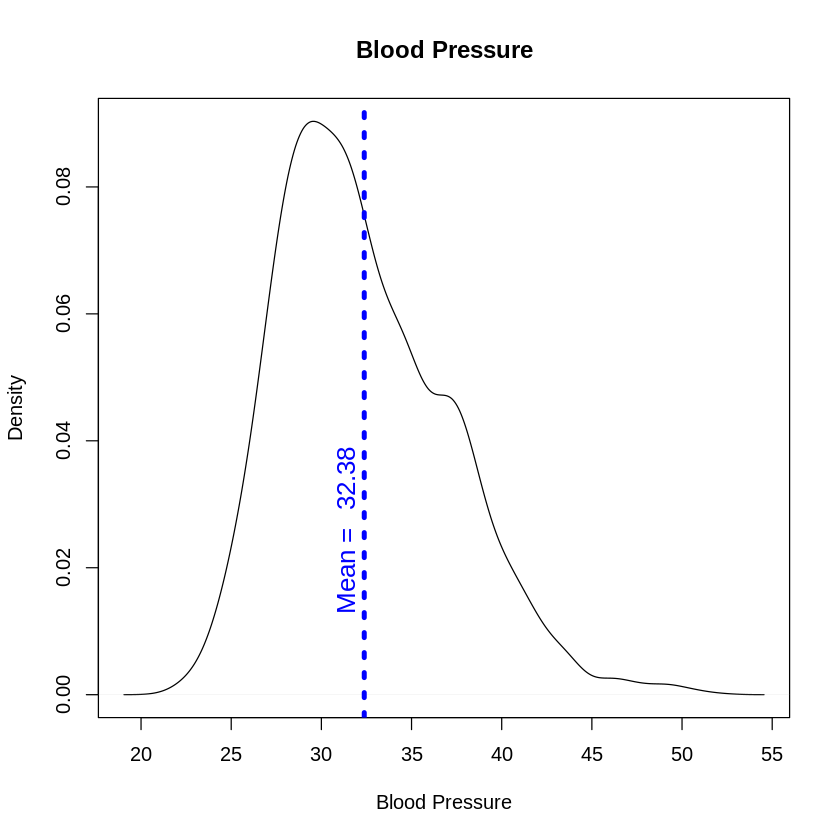

In [ ]:
# Check distribution of HBP

plot(density(temp$HBP), xlab="Blood Pressure", main="Blood Pressure") 
abline(v= mean(temp$HBP), col='Blue', lty=3, lwd=4)
text(x=mean(temp$HBP)-1, y=0.02, label="Mean = ", cex = 1.3, col="Blue", srt = 90)
text(x=mean(temp$HBP)-1, y=0.034, label= round(mean(temp$HBP),2), cex = 1.3, col="Blue", srt = 90)
mean(temp$HBP)


**Null ($H_0$) and Alternate ($H_1$) Hypothesis:**<br>
<center> $H_0:\mu \le 32.38$<br>
$H_1:\mu > 32.38$ </center> 

**Level of Significance:** With 95% confidence interval, the level of significance is $0.05$

In [ ]:
missi_data = subset(temp, temp$State_code == "MS")
missi_data

,State_code,Loc_Name,teeth_loss,Arthritis,drinking,cancer,cer_cancer_screen,ch_screen,chronic_disease,chronic_obs_pul,⋯,old_adult_women,physical_health,not_sleeping,stroke,med_HBP,dentist_visit,doc_visit,State,Region,Division
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1517,MS,Webster,20.5,30.2,14.5,6.4,84.0,78.0,3.1,9.0,⋯,19.8,15.4,36.7,3.8,64.1,50.6,73.5,Mississippi,South,East South Central
1518,MS,Madison,12.1,24.4,15.9,6.4,88.3,82.8,2.6,5.6,⋯,24.3,10.6,34.6,2.9,63.0,63.6,77.1,Mississippi,South,East South Central
1519,MS,Quitman,32.5,34.4,10.8,6.0,83.3,78.0,4.5,11.4,⋯,17.7,20.6,43.1,6.2,70.2,40.3,78.7,Mississippi,South,East South Central
1520,MS,Hancock,16.5,27.7,16.1,6.5,84.9,78.9,2.8,7.9,⋯,22.1,13.6,34.9,3.3,61.6,55.7,72.6,Mississippi,South,East South Central
1521,MS,Newton,21.6,29.7,13.9,6.3,84.9,78.7,3.3,9.2,⋯,18.2,16.3,39.7,4.2,64.6,48.6,75.3,Mississippi,South,East South Central
1522,MS,Stone,21.6,29.6,15.3,6.4,84.0,78.1,3.1,9.0,⋯,19.6,15.2,36.4,3.8,63.3,48.4,73.7,Mississippi,South,East South Central
1523,MS,Prentiss,23.7,31.9,14.8,6.5,82.3,76.3,3.3,10.5,⋯,20.7,17.7,37.2,4.2,64.0,48.3,73.7,Mississippi,South,East South Central
1524,MS,Clarke,20.9,30.1,14.2,6.3,85.4,78.8,3.2,8.7,⋯,19.5,15.3,37.0,4.0,65.1,52.3,75.0,Mississippi,South,East South Central
1525,MS,Yalobusha,21.8,29.0,13.4,6.2,84.8,78.6,3.2,8.6,⋯,20.2,15.3,39.3,4.1,66.2,49.7,75.9,Mississippi,South,East South Central


In [ ]:
mean(missi_data$HBP)

[1] 41.32439

**Formula for Test Statistics:**

When population standard deviation is unknown, the value of the test statistic is computed by $t$ distribution:<br>

 <center> $t$ = $\frac{\bar{X} - \mu}{s/\sqrt n}$</center>


*   $\bar{X}$ = Sample Mean
*   $\mu$ = Population Mean
*   $s$ = Sample Standard Deviation
*   $n$ = Number of Samples

In [ ]:
x_bar = mean(missi_data$HBP)
mu = mean(temp$HBP)
s = sd(missi_data$HBP)
n = nrow(missi_data)
#Calculate t

t = (x_bar-mu)/(s/sqrt(n))
t

[1] 18.53454

In [ ]:
alpha = 0.05 
t.alpha = qt(alpha, df=n-1)
t.alpha

[1] -1.663884

**Decision Rule:**

If $t$ is less than or equal to $-1.664$, do not reject null hypothesis. If the computed value of $t$ is greater than $-1.664$, reject the null hypothesis.

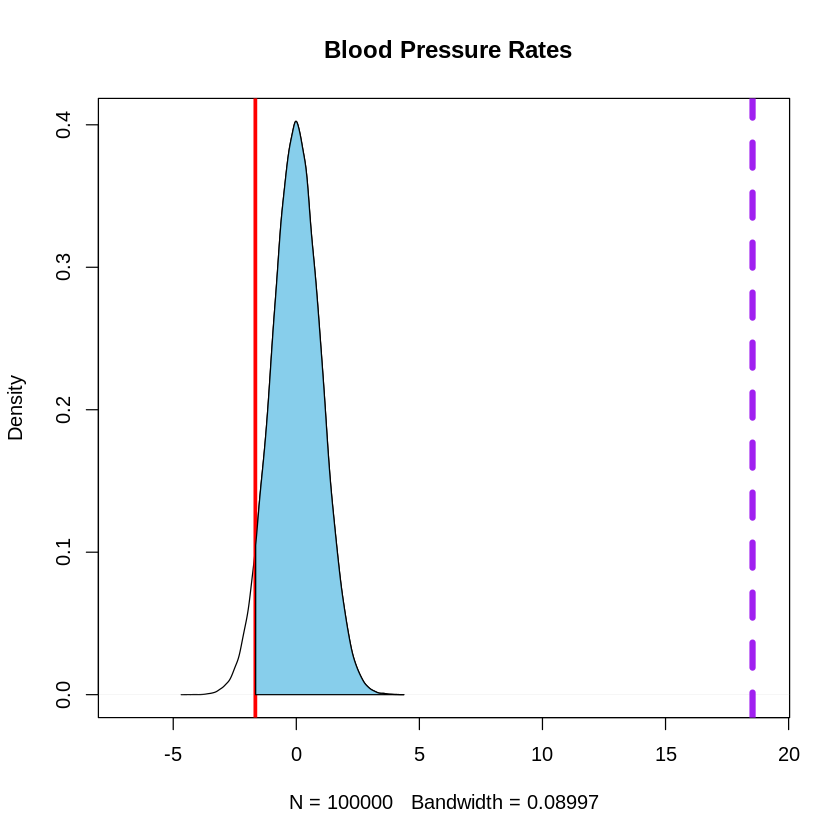

In [ ]:


tmp = rnorm(100000, mean=0, sd=1) # 
plot(density(tmp), main=' Blood Pressure Rates', xlim=c(-7,19)) 

# add a line for our test statistic, -10.4664
abline(v=t, col='purple', lty = 2, lwd=5)

# add another line for our critical value, -1.6577
abline(v=t.alpha, lwd=3, col='red')

# shade values less than the critical value & greater than negative infinity
dens = density(tmp)
x1 <- min(which(dens$x >= t.alpha))
x2 <- max(which(dens$x <= Inf))
with(dens, polygon(x=c(x[c(x1,x1:x2,x2)]), y= c(0, y[x1:x2], 0), col="skyblue")) # shade it blue!

**Decision:** Because the computed value of $t$, i.e. $18.54$ is not less than $-1.664$, $H_0$ is rejected.<br>


**Interpretation of the Result:** We were successfull to disprove the null hypothesis and hence can conclude that the hypertension rate in Mississippi state is **much greater** than the average national rate of $32.37$ since the $t$ value is too high.

##Two Sample Hypothesis Test

The 2020 annual report of America's Health Rankings by United Health Foundation states that High Blood Pressure and Obesity are the leading causes of death in Mississippi and the report also states that Mississipi ranks the lowest (49th and 50th respectively) amongst all the states based on health measures evaluated on HBP and Obesity. (Refer to [14] in citations) <br>
Since the ranking on both these factors is almost same,  we consider that mean of adults with obesity in Mississippi is equal to mean of adults with high blood pressure. This becomes the basis of our hypothesis. <br>

**Null ($H_0$) and Alternate ($H_1$) Hypothesis:**
<center> $H_0$  :  $\mu_1$ = $\mu_2$<br>
$H_1$  :  $\mu_1$ $\ne \mu_2$</center>




*   $\mu_1$ = Mean of adults with HBP
*   $\mu_2$ = Mean of adults with Obesity

In [ ]:
# Create subset for details with HBP and Obesity in Mississippi

table1 = data.frame(Location = missi_data$Loc_Name, HBP = missi_data$HBP, Obesity = missi_data$obesity)
table1

Location,HBP,Obesity
<chr>,<dbl>,<dbl>
Webster,38.4,37.6
Madison,34.5,33.2
Quitman,48.2,45.6
Hancock,34.7,36.1
Newton,40.1,38.2
Stone,37.5,37.5
Prentiss,39.1,40.9
Clarke,39.8,38.3
Yalobusha,41.0,41.1


**Level of Significance:** With 95% confidence interval, the level of significance is $0.05$

**Two-Sample tests of Means - Unknown Standard Deviation:**<br>
<center> $t$ = $\frac{{\bar{X_1}-\bar{X_2}}}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2}})}$ <br></center>

where:<br>
$\bar{X_1}$ is the mean of the first sample<br>
$\bar{X_2}$ is the mean of the second sample<br>
$n_1$ is the number of observations in the first sample<br>
$n_2$ is the number of observations in the second sample<br>
$s_p^2$ is the pooled estimate of the population variance

**The following formula is used to pool the sample standard deviations:**<br>
<center> $s_p^2$ = $\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}$</center>

where:<br>
$s_1^2$ is the variance (standard deviation squared) of the first sample.<br>
$s_2^2$ is the variance of the second sample.<br>


In [ ]:
x_bar_HBP = mean(table1$HBP)
x_bar_Obesity = mean(table1$Obesity)
sd_HBP = sd(table1$HBP)
sd_Obesity = sd(table1$Obesity)
n1 = nrow(table1) #samples in table 1
n2 = nrow(table1) #samples in table 2
df = n1 + n2 - 2 #degree of freedom 


In [ ]:
#calculating pooled estimate of the population variance
sp=(((n1-1)*sd_HBP^2)+((n2-1)*sd_Obesity^2))/df 
sp

[1] 17.58613

In [ ]:
# Calculating t distribution as population standard deviation is unknown
t = (x_bar_HBP - x_bar_Obesity)/sqrt(sp*(1/n1 + 1/n2)) 
t

[1] 0.01489645

In [ ]:
alpha = 0.05  # level of significance
t.half.alpha = qt(1-alpha/2, df=df) 
c(-t.half.alpha, t.half.alpha) # calculating the critical value range

[1] -1.974716  1.974716

**Decision rule:** If the computed $t$ value falls between $-1.975$ and $1.975$, do not reject the null hypothesis ($H_0$), else reject the null hypothesis ($H_0$).

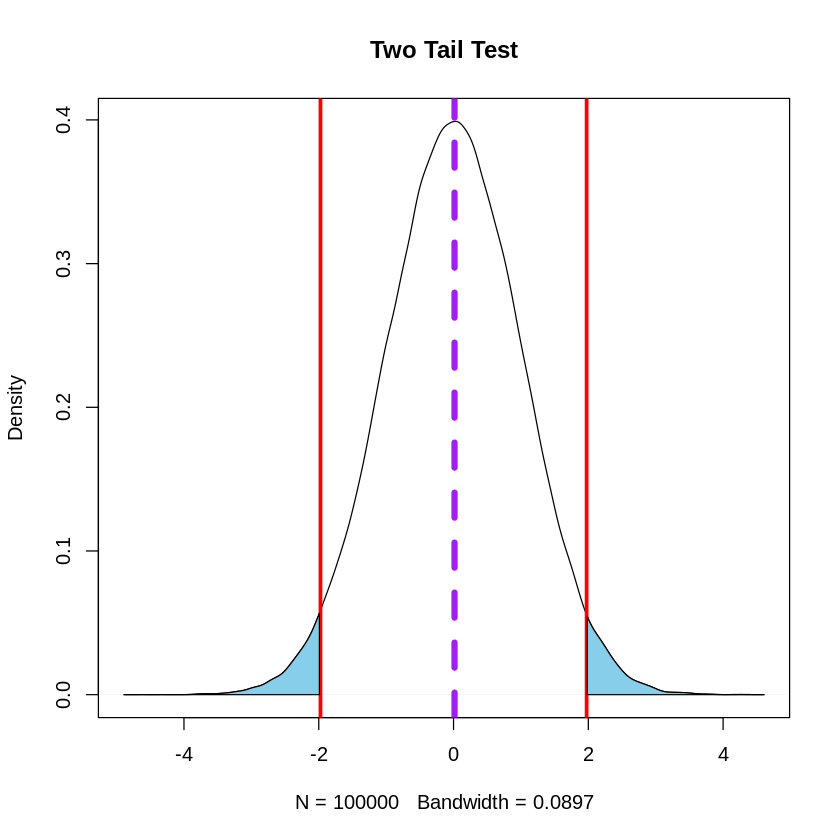

In [ ]:
tmp = rnorm(100000, mean=0, sd=1)
plot(density(tmp), main='Two Tail Test')

# add a line on the right tail
abline(v=t.half.alpha, col='red', lwd=3)
# add the shaded polygon to the RIGHT
dens = density(tmp) # store those value
x1 <- min(which(dens$x >= t.half.alpha))
x2 <- max(which(dens$x <= Inf))
with(dens, polygon(x=c(x[c(x1,x1:x2,x2)]), y= c(0, y[x1:x2], 0), col="skyblue"))

# add a line on the left tail
abline(v=-t.half.alpha, col='red', lwd=3)
# add the shaded polygon to the LEFT
dens = density(tmp) # store those value
x1 <- min(which(dens$x >= -Inf))
x2 <- max(which(dens$x <= -t.half.alpha))
with(dens, polygon(x=c(x[c(x1,x1:x2,x2)]), y= c(0, y[x1:x2], 0), col="skyblue"))

# now add our purple line
abline(v=t, lty=2, lwd=5, col='purple')

In [ ]:
# Calculating p-value
pval = 2*pt(t,df=df, lower.tail = FALSE) 
pval

[1] 0.9881331


**Decision:** Since, the test statistic value 't', i.e.$0.015$ falls in the region between $-1.975$ and $1.975$, the decision is to not reject the null hypothesis. <br>
Moreover, the $p$-value of $0.9881$ is much greater than the significance level of $0.05$ decided upon initially, so $H_0$ is not rejected.<br>
<br>
**Interpretation of the result**: We conclude that there is 98.81% chance that the mean of adults with obesity in Mississippi is equal to the mean of adults with high blood pressure in Mississippi. Hence, our results support the conclusions from the report that currently Obesity and Blood Pressure are equally fatal for people in Mississippi

# Modeling

### Full Linear Regression Model

In [ ]:
#correlation wrt unhealthy behaviours
HBP_Corr_unhealthy = subset(temp, 
                            select = c(
                                        HBP, 
                                        drinking, 
                                        smoking, 
                                        obesity, 
                                        not_sleeping
                                      )
                                )
cor(HBP_Corr)

,HBP,drinking,smoking,obesity,not_sleeping,med_HBP
HBP,1.0000000,-0.6785105,0.6761055,0.7139642,0.7746611,0.8110757
drinking,-0.6785105,1.0000000,-0.3290419,-0.3234388,-0.6442544,-0.4766185
smoking,0.6761055,-0.3290419,1.0000000,0.6240325,0.6463071,0.5499420
obesity,0.7139642,-0.3234388,0.6240325,1.0000000,0.5295514,0.6534702
not_sleeping,0.7746611,-0.6442544,0.6463071,0.5295514,1.0000000,0.6627992
med_HBP,0.8110757,-0.4766185,0.5499420,0.6534702,0.6627992,1.0000000


In [ ]:
#correlation between the HBP and other healthy outcomes
HBP_Corr_healthy = subset(temp, select = c(HBP,teeth_loss, cancer, Arthritis, HCH, mental_health, physical_health, Asthama, diabetes, CHD, chronic_disease, chronic_obs_pul))
cor(HBP_Corr_healthy)


,HBP,teeth_loss,cancer,Arthritis,HCH,mental_health,physical_health,Asthama,diabetes,CHD,chronic_disease,chronic_obs_pul
HBP,1.0000000,0.81453866,-0.21011976,0.7096382,0.8176562,0.77878304,0.7904369,0.5971522,0.8740105,0.82001667,0.7779115,0.7824986
teeth_loss,0.8145387,1.00000000,-0.08947836,0.7575985,0.6549443,0.88910485,0.9301972,0.7480458,0.8458489,0.94212455,0.8420753,0.9043493
cancer,-0.2101198,-0.08947836,1.00000000,0.2592384,-0.1386331,0.05125821,-0.1332677,0.1937891,-0.4566026,-0.07617017,-0.4186150,0.1075607
Arthritis,0.7096382,0.75759846,0.25923838,1.0000000,0.6687203,0.87987581,0.7891989,0.7804568,0.5684109,0.77097671,0.5174493,0.8811907
HCH,0.8176562,0.65494432,-0.13863313,0.6687203,1.0000000,0.73789083,0.7041788,0.4695163,0.6702573,0.71482661,0.5646890,0.7469529
mental_health,0.7787830,0.88910485,0.05125821,0.8798758,0.7378908,1.00000000,0.9388528,0.8112802,0.7359623,0.89383445,0.7093850,0.9526729
physical_health,0.7904369,0.93019717,-0.13326773,0.7891989,0.7041788,0.93885281,1.0000000,0.7847860,0.8471282,0.94780985,0.8604509,0.9052980
Asthama,0.5971522,0.74804575,0.19378913,0.7804568,0.4695163,0.81128015,0.7847860,1.0000000,0.5872385,0.70859279,0.6246011,0.7681243
diabetes,0.8740105,0.84584891,-0.45660262,0.5684109,0.6702573,0.73596233,0.8471282,0.5872385,1.0000000,0.84814875,0.9462421,0.7152847
CHD,0.8200167,0.94212455,-0.07617017,0.7709767,0.7148266,0.89383445,0.9478099,0.7085928,0.8481488,1.00000000,0.8437159,0.9175947


In [ ]:
#correlation between HBP and prevention
HBP_Corr_Prevention = subset(temp, select = c(HBP, med_HBP, doc_visit))
cor(HBP_Corr_Prevention)

,HBP,med_HBP,doc_visit
HBP,1.0000000,0.8110757,0.5195130
med_HBP,0.8110757,1.0000000,0.7179782
doc_visit,0.5195130,0.7179782,1.0000000


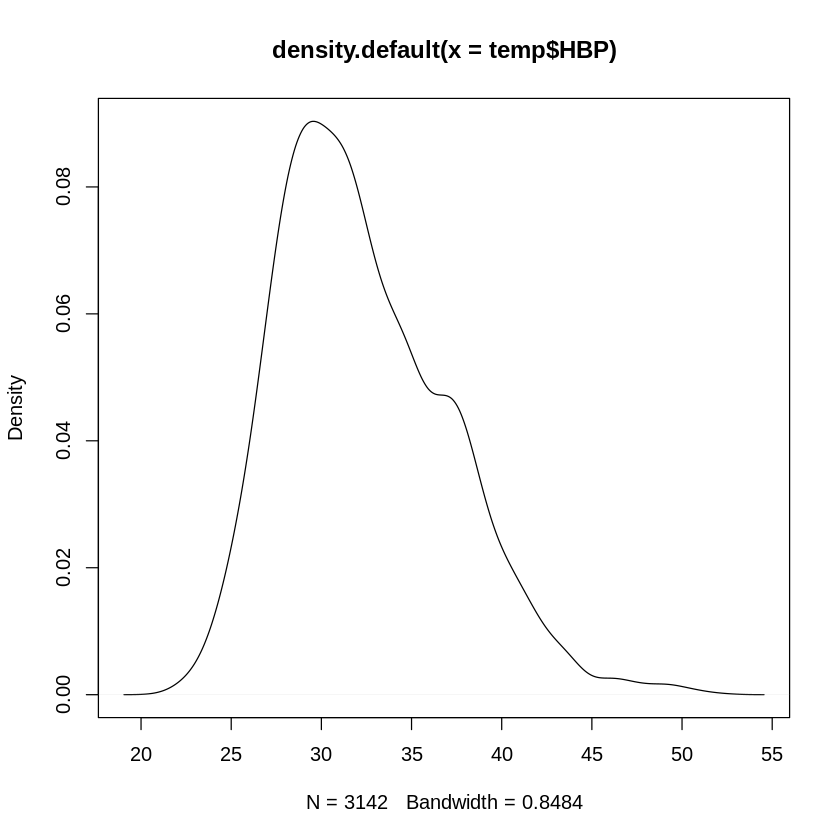

In [ ]:
plot(density(temp$HBP))

In [ ]:
install.packages("olsrr")
install.packages("car") 
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
model_data = subset(temp, select = c("Arthritis", "drinking", "cancer", "cer_cancer_screen", "ch_screen", "chronic_disease", "chronic_obs_pul", "CHD", "Asthama", "lack_health_ins","smoking",
"diabetes", "Fecal_blood_test", "HBP", "HCH", "mammography", "mental_health", "no_leisure", "obesity", "physical_health",
"not_sleeping", "stroke", "med_HBP", "doc_visit" ))

In [ ]:
#Full model Linear Regression
fit.full <- lm(HBP ~., data=model_data)
summary(fit.full)
AIC(fit.full)


Call:
lm(formula = HBP ~ ., data = model_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8266 -0.7660 -0.0164  0.7358  5.9978 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -25.605516   2.088946 -12.258  < 2e-16 ***
Arthritis           0.062991   0.019326   3.259 0.001129 ** 
drinking           -0.141814   0.014939  -9.493  < 2e-16 ***
cancer              0.071173   0.185822   0.383 0.701733    
cer_cancer_screen   0.243933   0.024747   9.857  < 2e-16 ***
ch_screen           0.042323   0.014688   2.881 0.003986 ** 
chronic_disease    -4.828951   0.353092 -13.676  < 2e-16 ***
chronic_obs_pul    -0.394890   0.059186  -6.672 2.97e-11 ***
CHD                 1.030040   0.107119   9.616  < 2e-16 ***
Asthama             0.069279   0.052895   1.310 0.190379    
smoking            -0.025960   0.019795  -1.311 0.189819    
diabetes            0.812127   0.057682  14.079  < 2e-16 ***
Fecal_blood_test    0.026843   0.010618   2.528 0.

[1] 10196.31

In [ ]:
install.packages('Metrics')
library(Metrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Analysis Parameter
actual = model_data$HBP
prediction = round(fit.full$fitted.values,1)
preds_full = prediction
mae(actual, preds_full)
mape(actual, preds_full)
rmse(actual, preds_full)
bias(actual, preds_full)

[1] 0.9939847

[1] 0.03098044

[1] 1.287245

[1] -0.0001591343

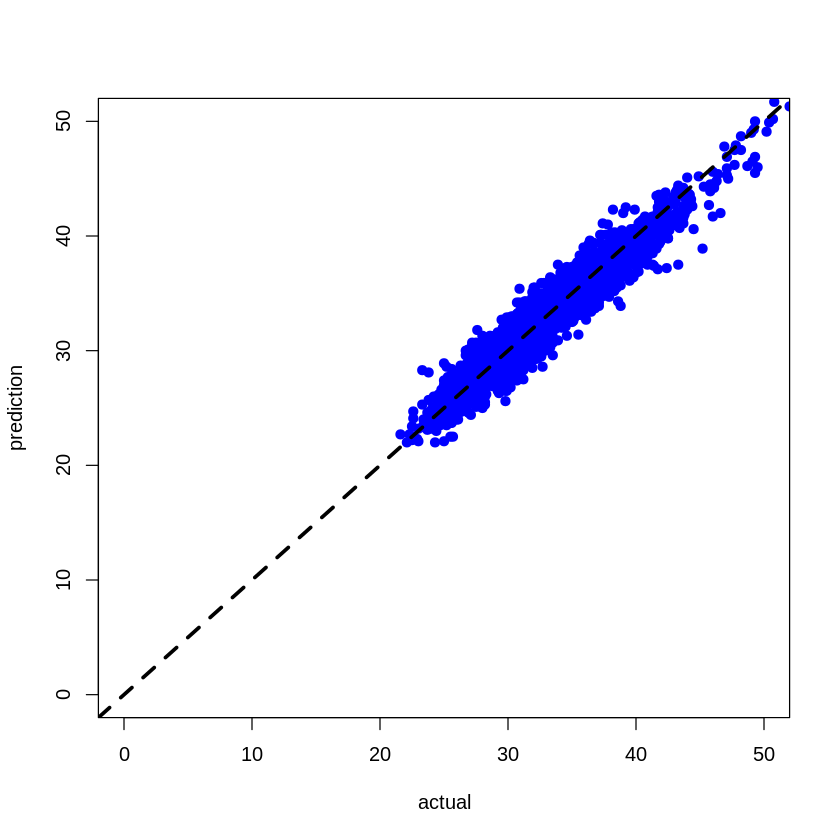

In [ ]:
#Actual vs Predicted
plot(actual, prediction, col='blue', pch=19,
      xlim=c(0,50), ylim=c(0,50))
abline(0,1, col='black', lty=2, lwd=3)

In [ ]:
CI = predict(fit.full, model_data, interval='confidence') # Finding Confidence Interval

In [ ]:
PI = predict(fit.full, model_data, interval='prediction') # Finding Predicted Intervals


##Reduced Linear Regression

In [ ]:
install.packages("olsrr")
library(olsrr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
print(vif(fit.full))

        Arthritis          drinking            cancer cer_cancer_screen 
         9.306374          4.736248          4.989353          4.750830 
        ch_screen   chronic_disease   chronic_obs_pul               CHD 
         3.582854         48.365809         26.859674         31.180334 
          Asthama           smoking          diabetes  Fecal_blood_test 
         6.114811         14.236827         37.799416          5.359616 
              HCH       mammography     mental_health        no_leisure 
         4.440236          4.031793         30.213024         11.704692 
          obesity   physical_health      not_sleeping            stroke 
         3.985765         48.502949          5.913538         29.759842 
          med_HBP         doc_visit 
         8.099670          5.449668 


Backward Stepwise Linear Regression Model

In [ ]:
fit.full <- lm(HBP ~., data=model_data)
backward = ols_step_backward_p(fit.full) 
summary(backward$model)
AIC(backward$model)


Call:
lm(formula = paste(response, "~", paste(preds, collapse = " + ")), 
    data = l)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8370 -0.7624 -0.0184  0.7356  5.9968 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -25.211259   1.817481 -13.872  < 2e-16 ***
Arthritis           0.063717   0.019230   3.313 0.000932 ***
drinking           -0.141999   0.014929  -9.511  < 2e-16 ***
cer_cancer_screen   0.244427   0.024710   9.892  < 2e-16 ***
ch_screen           0.041928   0.014650   2.862 0.004237 ** 
chronic_disease    -4.854709   0.346581 -14.007  < 2e-16 ***
chronic_obs_pul    -0.392910   0.058951  -6.665 3.12e-11 ***
CHD                 1.043891   0.100817  10.354  < 2e-16 ***
Asthama             0.076862   0.049043   1.567 0.117157    
smoking            -0.026203   0.019783  -1.325 0.185418    
diabetes            0.804200   0.053834  14.939  < 2e-16 ***
Fecal_blood_test    0.027064   0.010601   2.553 0.010728 *  
HCH      

[1] 10194.46

Forward Stepwise Linear model 

In [ ]:
r_fit_full <- lm(HBP ~.,  data=model_data) #Fitting the full model excluding the target variable
forward <- ols_step_forward_p(r_fit_full)
summary(forward$model)
AIC(forward$model)
forward


Call:
lm(formula = paste(response, "~", paste(preds, collapse = " + ")), 
    data = l)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8370 -0.7624 -0.0184  0.7356  5.9968 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -25.211259   1.817481 -13.872  < 2e-16 ***
Arthritis           0.063717   0.019230   3.313 0.000932 ***
drinking           -0.141999   0.014929  -9.511  < 2e-16 ***
chronic_disease    -4.854709   0.346581 -14.007  < 2e-16 ***
chronic_obs_pul    -0.392910   0.058951  -6.665 3.12e-11 ***
CHD                 1.043891   0.100817  10.354  < 2e-16 ***
smoking            -0.026203   0.019783  -1.325 0.185418    
diabetes            0.804200   0.053834  14.939  < 2e-16 ***
HCH                 0.641178   0.019879  32.253  < 2e-16 ***
mental_health       0.176233   0.050530   3.488 0.000494 ***
no_leisure          0.056239   0.013922   4.040 5.48e-05 ***
obesity             0.037355   0.009534   3.918 9.11e-05 ***
physical_

[1] 10194.46


                                  Selection Summary                                   
-------------------------------------------------------------------------------------
        Variable                           Adj.                                          
Step         Entered         R-Square    R-Square      C(p)         AIC         RMSE     
-------------------------------------------------------------------------------------
   1    Arthritis              0.9295      0.9292    196.0598    10365.3178    1.2557    
   2    drinking               0.9311      0.9308    122.3283    10294.5072    1.2414    
   3    chronic_disease        0.9330      0.9327     35.9345    10209.3322    1.2245    
   4    chronic_obs_pul        0.9333      0.9329     24.3380    10197.7059    1.2221    
   5    CHD                    0.9334      0.9330     22.3604    10195.7084    1.2215    
   6    smoking                0.9334      0.9330     21.6023    10194.9335    1.2211    
   7    diabetes    

Choosing Backward model because of its lower AIC than forward stepwise model 

In [ ]:
backward$model


Call:
lm(formula = paste(response, "~", paste(preds, collapse = " + ")), 
    data = l)

Coefficients:
      (Intercept)           drinking  cer_cancer_screen          ch_screen  
        -23.32492           -0.16245            0.24992            0.06516  
  chronic_disease    chronic_obs_pul                CHD            Asthama  
         -4.41824           -0.42574            1.07396           -0.13617  
  lack_health_ins            smoking           diabetes                HCH  
         -0.08199           -0.04168            0.85959            0.66969  
      mammography      mental_health         no_leisure            obesity  
         -0.01174            0.28628            0.06739            0.04741  
  physical_health       not_sleeping             stroke            med_HBP  
         -0.43647            0.05544            3.96438            0.15253  
        doc_visit  
         -0.13345  


In [ ]:
backward$model$terms

HBP ~ drinking + cer_cancer_screen + ch_screen + chronic_disease + 
    chronic_obs_pul + CHD + Asthama + lack_health_ins + smoking + 
    diabetes + HCH + mammography + mental_health + no_leisure + 
    obesity + physical_health + not_sleeping + stroke + med_HBP + 
    doc_visit
attr(,"variables")
list(HBP, drinking, cer_cancer_screen, ch_screen, chronic_disease, 
    chronic_obs_pul, CHD, Asthama, lack_health_ins, smoking, 
    diabetes, HCH, mammography, mental_health, no_leisure, obesity, 
    physical_health, not_sleeping, stroke, med_HBP, doc_visit)
attr(,"factors")
                  drinking cer_cancer_screen ch_screen chronic_disease
HBP                      0                 0         0               0
drinking                 1                 0         0               0
cer_cancer_screen        0                 1         0               0
ch_screen                0                 0         1               0
chronic_disease          0                 0         0            

In [ ]:
df_backward = subset(temp, select = c(HBP, drinking, cer_cancer_screen, ch_screen, chronic_disease, 
    chronic_obs_pul, CHD, Asthama, lack_health_ins, smoking, 
    diabetes, HCH, mammography, mental_health, no_leisure, obesity, 
    physical_health, not_sleeping, stroke, med_HBP, doc_visit))

In [ ]:
summary(backward$model)


Call:
lm(formula = paste(response, "~", paste(preds, collapse = " + ")), 
    data = l)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8370 -0.7624 -0.0184  0.7356  5.9968 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -25.211259   1.817481 -13.872  < 2e-16 ***
Arthritis           0.063717   0.019230   3.313 0.000932 ***
drinking           -0.141999   0.014929  -9.511  < 2e-16 ***
cer_cancer_screen   0.244427   0.024710   9.892  < 2e-16 ***
ch_screen           0.041928   0.014650   2.862 0.004237 ** 
chronic_disease    -4.854709   0.346581 -14.007  < 2e-16 ***
chronic_obs_pul    -0.392910   0.058951  -6.665 3.12e-11 ***
CHD                 1.043891   0.100817  10.354  < 2e-16 ***
Asthama             0.076862   0.049043   1.567 0.117157    
smoking            -0.026203   0.019783  -1.325 0.185418    
diabetes            0.804200   0.053834  14.939  < 2e-16 ***
Fecal_blood_test    0.027064   0.010601   2.553 0.010728 *  
HCH      

In [ ]:
#Removing the varaibles where p > 0.05
backward_model = lm(HBP ~ drinking + cer_cancer_screen +  ch_screen + chronic_disease + 
    chronic_obs_pul + CHD +  lack_health_ins +  
    diabetes + HCH +  mental_health + no_leisure + obesity + 
    physical_health + not_sleeping+ stroke + med_HBP + doc_visit, data = temp)

In [ ]:
AIC(backward_model)

[1] 10077.34

In [ ]:
actual = temp$HBP
preds_backward = round(backward_model$fitted.values,1)

In [ ]:
mae(actual,preds_backward)

[1] 0.9100573

In [ ]:
mape(actual, preds_backward)

[1] 0.02853055

In [ ]:
rmse(actual, preds_backward)

[1] 1.195925

In [ ]:
bias(actual, preds_backward)

[1] -0.0002546149

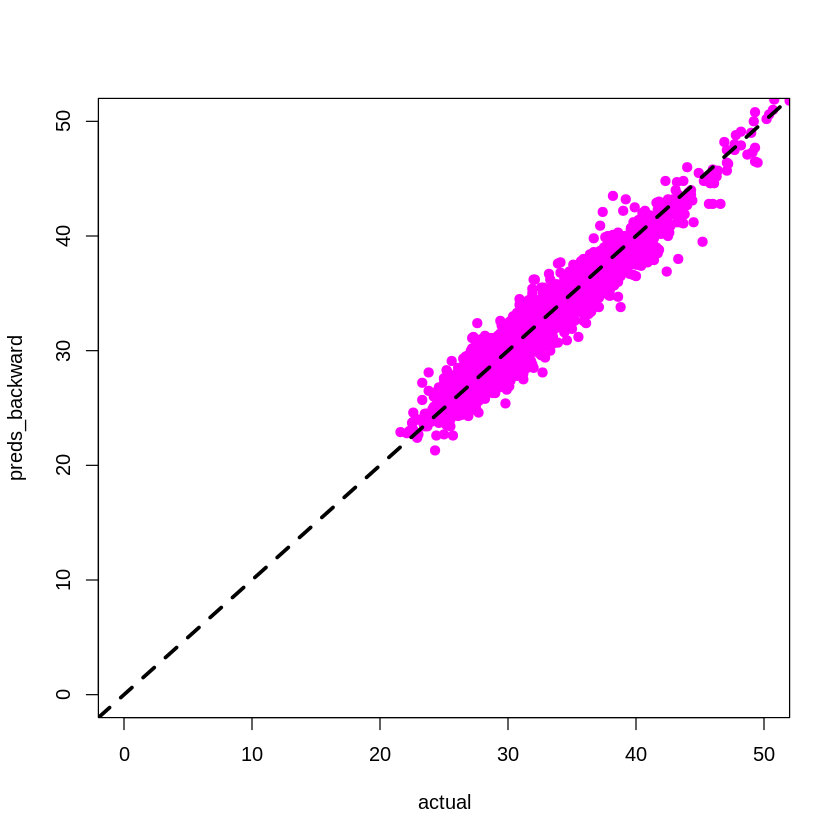

In [ ]:
plot(actual, preds_backward, col='magenta', pch=19,
      xlim=c(0,50), ylim=c(0,50))
abline(0,1, col='black', lty=2, lwd=3)

In [ ]:
CI = predict(backward_model, temp, interval='confidence') # Finding confidence interval
CI
PI = predict(backward_model, temp, interval='prediction') # Finding prediction interval
PI

,fit,lwr,upr
1,35.28563,34.96346,35.60779
2,27.30384,27.09536,27.51231
3,33.65145,33.10977,34.19313
4,35.09406,34.80902,35.37910
5,26.79205,26.59109,26.99301
6,28.08472,27.87085,28.29860
7,27.75045,27.51594,27.98497
8,32.06244,31.82941,32.29546
9,36.16976,35.84306,36.49646
10,26.42705,26.23455,26.61954


,fit,lwr,upr
1,35.28563,32.91263,37.65862
2,27.30384,24.94359,29.66409
3,33.65145,31.23883,36.06407
4,35.09406,32.72582,37.46230
5,26.79205,24.43245,29.15165
6,28.08472,25.72399,30.44546
7,27.75045,25.38776,30.11315
8,32.06244,29.69989,34.42498
9,36.16976,33.79614,38.54337
10,26.42705,24.06815,28.78594


**Comparing model performance of Full Linear regression model and Reduced Linear regression model**

The AIC index takes into account a model’s statistical fit and the number of parameters needed to achieve this fit. Models with smaller AIC values are preferred—indicating adequate fit with fewer parameters.

$\text{AIC} = -2LL + 2k$

where $k$ is the number of predictors in your model and $LL$ is the log-likelihood.

Checking the AIC for all our models to check which one is the best one - 

In [ ]:
AIC(fit.full) #Results of full linear regression model

[1] 10196.31

In [ ]:
AIC(backward_model) #Results of backward stepwise reduced model after removing variables with insignificant contribution

[1] 10077.34

The AIC values represent that the reduced model using backward stepwise regression after removing variables with insignificant contribution has the least AIC indicating a better performance

Viewing all the predictions

In [ ]:
full = preds_full
print(full)

   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
30.1 40.8 38.4 36.3 30.6 43.3 24.9 25.9 22.7 31.6 30.2 29.8 30.0 29.4 30.6 28.7 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
26.1 24.4 28.9 34.6 35.2 31.9 23.8 30.0 23.3 25.5 20.9 26.5 28.2 31.1 25.8 29.7 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
27.2 26.8 26.6 36.7 27.2 25.9 26.6 25.0 28.6 27.0 25.1 28.2 24.0 24.7 25.6 24.8 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
30.8 28.8 27.0 23.8 25.1 22.7 28.2 31.5 26.0 25.6 26.4 28.0 29.7 23.8 30.2 28.5 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
23.6 32.1 26.3 26.9 23.7 28.2 30.1 29.9 24.4 25.9 28.3 25.2 28.1 28.7 24.9 27.3 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
25.4 27.6 25.7 27.2 26.5 24.1 25.5 30.0 27.0 25.2 23.3 26.8 28.1 24.1 23.5 26.0 
  97   98   99  100  101  10

In [ ]:
reduced = preds_backward
print(reduced)

   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
35.3 27.3 33.7 35.1 26.8 28.1 27.8 32.1 36.2 26.4 27.9 26.6 27.9 28.6 37.7 25.4 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
44.8 28.9 31.3 33.7 31.2 26.7 29.2 30.2 37.4 30.8 26.0 25.9 28.8 39.6 40.0 36.4 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
37.1 40.8 39.4 40.8 38.8 38.6 37.0 39.6 39.2 33.4 38.7 38.1 36.1 39.3 50.2 38.9 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
43.2 38.9 45.1 46.3 36.5 42.3 38.3 43.3 36.2 47.1 38.4 33.6 41.3 38.0 39.1 37.8 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
39.5 43.1 41.2 37.3 41.3 38.6 46.4 36.6 41.8 47.7 46.5 37.9 37.0 37.1 39.1 36.6 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
36.9 39.5 47.5 34.3 37.4 41.7 37.6 39.1 44.6 40.2 38.4 41.2 45.2 37.9 43.6 50.8 
  97   98   99  100  101  10

##Reduced Logistic Regression Model

In [ ]:
install.packages('data.table') #installing data table package
library(data.table)

In [ ]:
df = model_data
print(paste('number of rows:', nrow(df)))
print(paste('number of columns:', ncol(df)))
print(paste('column types: \n', str(df)))

[1] "number of rows: 3142"
[1] "number of columns: 15"
'data.frame':	3142 obs. of  15 variables:
 $ drinking     : num  17.7 19.3 14.2 16.7 18.5 17.9 16.2 18.2 16.8 17.9 ...
 $ cancer       : num  6.6 6.3 5.3 6.5 6.4 6.4 6.2 6.5 6.6 6.4 ...
 $ CHD          : num  9.3 5.9 7.5 8.8 6.1 6.2 5.4 7.7 9.5 5.6 ...
 $ smoking      : num  32.5 19.9 21 29 21.4 18.6 17 26.9 33.9 17.6 ...
 $ diabetes     : num  15.1 8.8 13.9 14.1 8.8 8.8 9.1 11.7 15.1 8.6 ...
 $ HBP          : num  37 28 33.9 34.9 29.8 28.8 30.7 33.2 36.4 28 ...
 $ HCH          : num  29.1 28.1 29.7 29.9 27.8 28.8 29.2 29 29.5 27.6 ...
 $ mental_health: num  18.4 12.9 11.5 17.5 13.9 12.4 12 16.1 18.7 12.5 ...
 $ no_leisure   : num  28.8 20.4 26.8 26.9 20.3 19.2 19 24.1 26.7 18.4 ...
 $ obesity      : num  33.4 27.2 27.8 35.1 32 26.1 27.8 32.2 38.1 26.3 ...
 $ not_sleeping : num  39.1 33.1 38.9 37.6 34.4 31.7 34.4 35.6 37.9 31 ...
 $ stroke       : num  5.3 2.9 3.9 4.9 3.1 3 2.7 4.1 5.4 2.8 ...
 $ med_HBP      : num  49.8 48.3 52.9 

In [ ]:
d = median(df$HBP)
d

[1] 31.6

In [ ]:
df$Flag[df$HBP > d] = 1
df$Flag[df$HBP <= d] = 0 
df$Flag

[1] 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0
 [334] 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 [371] 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1
 [408] 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0
 [445] 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 [482] 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0
 [519] 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1
 [704] 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 [741] 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1
 [778] 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 [815] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1
 [852] 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 [889] 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1
 [926] 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0
 [963] 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1
[1000] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1037] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1074] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1111] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1148] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0
[1222] 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
[1259] 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
[1296] 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1370] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[1407] 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1
[1444] 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1
[1481] 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1
[1518] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1555] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1592] 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1629] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1
[1666] 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1
[1703] 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1
[1740] 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
[1777] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1814] 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
table(df$Flag)


   0    1 
1583 1559 

In [ ]:
log_fit = glm(df$Flag ~. -HBP, data = df, family= 'binomial')
log_fit
summary(log_fit)


Call:  glm(formula = df$Flag ~ . - HBP, family = "binomial", data = df)

Coefficients:
  (Intercept)       drinking         cancer            CHD        smoking  
    -90.90066       -0.24349        4.80640       -0.98515        0.14738  
     diabetes            HCH  mental_health     no_leisure        obesity  
      1.94661        1.35501       -0.72554        0.01202        0.07317  
 not_sleeping         stroke        med_HBP  dentist_visit      doc_visit  
      0.27476        0.46943        0.30168        0.01948       -0.21144  

Degrees of Freedom: 3141 Total (i.e. Null);  3127 Residual
Null Deviance:	    4356 
Residual Deviance: 1069 	AIC: 1099


Call:
glm(formula = df$Flag ~ . - HBP, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8181  -0.1544  -0.0007   0.0911   3.3080  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -90.90066    6.70364 -13.560  < 2e-16 ***
drinking       -0.24349    0.05607  -4.342 1.41e-05 ***
cancer          4.80640    0.67980   7.070 1.55e-12 ***
CHD            -0.98515    0.34900  -2.823  0.00476 ** 
smoking         0.14738    0.06682   2.206  0.02740 *  
diabetes        1.94661    0.21891   8.892  < 2e-16 ***
HCH             1.35501    0.10192  13.295  < 2e-16 ***
mental_health  -0.72554    0.14622  -4.962 6.98e-07 ***
no_leisure      0.01202    0.05195   0.231  0.81705    
obesity         0.07317    0.03478   2.104  0.03541 *  
not_sleeping    0.27476    0.05028   5.465 4.63e-08 ***
stroke          0.46943    0.58386   0.804  0.42140    
med_HBP         0.30168    0.05698   5.294 1.20e-07 ***
dentist_visit  

In [ ]:
preds = (predict(log_fit, df, type='response'))
actual = df$Flag
preds = round(preds, 0)

In [ ]:
print(coef(log_fit))

  (Intercept)      drinking        cancer           CHD       smoking 
 -90.90066433   -0.24349145    4.80640030   -0.98515456    0.14738228 
     diabetes           HCH mental_health    no_leisure       obesity 
   1.94661329    1.35501394   -0.72554180    0.01201787    0.07316803 
 not_sleeping        stroke       med_HBP dentist_visit     doc_visit 
   0.27475966    0.46942683    0.30167536    0.01948110   -0.21144140 


In [ ]:
exp(coef(log_fit))

(Intercept)      drinking        cancer           CHD       smoking 
 3.329225e-40  7.838862e-01  1.222906e+02  3.733815e-01  1.158797e+00 
     diabetes           HCH mental_health    no_leisure       obesity 
 7.004924e+00  3.876815e+00  4.840622e-01  1.012090e+00  1.075911e+00 
 not_sleeping        stroke       med_HBP dentist_visit     doc_visit 
 1.316214e+00  1.599077e+00  1.352122e+00  1.019672e+00  8.094167e-01

In [ ]:
table(actual, preds)

      preds
actual    0    1
     0 1478  105
     1  122 1437

In [ ]:
install.packages('Metrics')
library(Metrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
accuracy(actual, preds)

[1] 0.927753

In [ ]:
precision(actual, preds)

[1] 0.9319066

In [ ]:
auc(actual, preds)

[1] 0.9277075

In [ ]:
recall(actual, preds)

[1] 0.9217447

In [ ]:
AIC(log_fit)

[1] 1098.559

In [ ]:
summary(log_fit)


Call:
glm(formula = df$Flag ~ . - HBP, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8181  -0.1544  -0.0007   0.0911   3.3080  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -90.90066    6.70364 -13.560  < 2e-16 ***
drinking       -0.24349    0.05607  -4.342 1.41e-05 ***
cancer          4.80640    0.67980   7.070 1.55e-12 ***
CHD            -0.98515    0.34900  -2.823  0.00476 ** 
smoking         0.14738    0.06682   2.206  0.02740 *  
diabetes        1.94661    0.21891   8.892  < 2e-16 ***
HCH             1.35501    0.10192  13.295  < 2e-16 ***
mental_health  -0.72554    0.14622  -4.962 6.98e-07 ***
no_leisure      0.01202    0.05195   0.231  0.81705    
obesity         0.07317    0.03478   2.104  0.03541 *  
not_sleeping    0.27476    0.05028   5.465 4.63e-08 ***
stroke          0.46943    0.58386   0.804  0.42140    
med_HBP         0.30168    0.05698   5.294 1.20e-07 ***
dentist_visit  

## Stepwise Logistic Regression Model

In [ ]:
install.packages('MASS') #installing MASS package
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked from ‘package:olsrr’:

    cement




In [ ]:
df = data.frame(df)
stepwise_model = stepAIC(log_fit, trace = TRUE)

Start:  AIC=1098.56
df$Flag ~ (drinking + cancer + CHD + smoking + diabetes + HBP + 
    HCH + mental_health + no_leisure + obesity + not_sleeping + 
    stroke + med_HBP + dentist_visit + doc_visit) - HBP

                Df Deviance    AIC
- no_leisure     1   1068.6 1096.6
- dentist_visit  1   1068.9 1096.9
- stroke         1   1069.2 1097.2
<none>               1068.6 1098.6
- obesity        1   1073.0 1101.0
- smoking        1   1073.4 1101.4
- CHD            1   1076.7 1104.7
- doc_visit      1   1084.4 1112.4
- drinking       1   1087.6 1115.6
- mental_health  1   1093.9 1121.9
- med_HBP        1   1097.4 1125.4
- not_sleeping   1   1099.6 1127.6
- cancer         1   1123.3 1151.3
- diabetes       1   1162.6 1190.6
- HCH            1   1325.4 1353.4

Step:  AIC=1096.61
df$Flag ~ drinking + cancer + CHD + smoking + diabetes + HCH + 
    mental_health + obesity + not_sleeping + stroke + med_HBP + 
    dentist_visit + doc_visit

                Df Deviance    AIC
- dentist_visit  1

In [ ]:
coef(stepwise_model) 

(Intercept)      drinking        cancer           CHD       smoking 
 -89.58808221   -0.23604192    4.89814645   -0.90929285    0.15529600 
     diabetes           HCH mental_health       obesity  not_sleeping 
   2.01520715    1.33375756   -0.72926090    0.06683782    0.27212069 
      med_HBP     doc_visit 
   0.29558918   -0.19853580

In [ ]:
summary(stepwise_model) 


Call:
glm(formula = df$Flag ~ drinking + cancer + CHD + smoking + diabetes + 
    HCH + mental_health + obesity + not_sleeping + med_HBP + 
    doc_visit, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7483  -0.1540  -0.0007   0.0925   3.2977  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -89.58808    6.29473 -14.232  < 2e-16 ***
drinking       -0.23604    0.05549  -4.254 2.10e-05 ***
cancer          4.89815    0.64562   7.587 3.28e-14 ***
CHD            -0.90929    0.31809  -2.859  0.00426 ** 
smoking         0.15530    0.06267   2.478  0.01322 *  
diabetes        2.01521    0.19121  10.539  < 2e-16 ***
HCH             1.33376    0.09584  13.916  < 2e-16 ***
mental_health  -0.72926    0.14186  -5.141 2.74e-07 ***
obesity         0.06684    0.03310   2.019  0.04344 *  
not_sleeping    0.27212    0.04909   5.544 2.96e-08 ***
med_HBP         0.29559    0.05550   5.326 1.00e-07 ***
doc_visit  

In [ ]:
AIC(log_fit)
AIC(stepwise_model)

[1] 1098.559

[1] 1093.523

In [ ]:
preds = predict(stepwise_model, df, type = 'response')
preds = round(preds,0)
preds

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    0    1    1    0    0    0    0    1    0    0    0    0    0    1    0 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    0    0    1    0    0    0    0    1    0    0    0    0    1    1    1 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
   1    1    1    1    1    1    1    1    1    1    0    1    1    1    1    1 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
   1    1    1    0    1    1    1    1    1    1    1    1    0    1    0    1 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
   1    1    1    1    1    1    1    1    1    0    1    1    1    1    1    1 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
   1    1    0    1    1    1    1    1    1    1    1    1    0    0    1    1 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
   0    0    0    0    0    1    0    0    0    0    0    0    0    1    0    0 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
   0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
   1    1    0    0    1    0    0    1    0    1    0    1    0    1    0    0 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
   0    1    1    0    0    0    1    0    1    1    0    0    0    1    0    0 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
   1    0    0    0    0    1    1    1    0    0    1    1    1    1    0    1 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
   1    1    0    0    0    1    0    1    0    0    1    1    1    1    1    0 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
   0    0    0    1    1    1    1

In [ ]:
actual = df$Flag
actual

[1] 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0
 [334] 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 [371] 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1
 [408] 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0
 [445] 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 [482] 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0
 [519] 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1
 [704] 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 [741] 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1
 [778] 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 [815] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1
 [852] 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 [889] 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1
 [926] 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0
 [963] 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1
[1000] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1037] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1074] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1111] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1148] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0
[1222] 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
[1259] 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
[1296] 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1370] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[1407] 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1
[1444] 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1
[1481] 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1
[1518] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1555] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1592] 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1629] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1
[1666] 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1
[1703] 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1
[1740] 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
[1777] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1814] 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
coef(stepwise_model)

(Intercept)      drinking        cancer           CHD       smoking 
 -89.58808221   -0.23604192    4.89814645   -0.90929285    0.15529600 
     diabetes           HCH mental_health       obesity  not_sleeping 
   2.01520715    1.33375756   -0.72926090    0.06683782    0.27212069 
      med_HBP     doc_visit 
   0.29558918   -0.19853580

In [ ]:
exp(coef(stepwise_model))

(Intercept)      drinking        cancer           CHD       smoking 
 1.237059e-39  7.897476e-01  1.340411e+02  4.028090e-01  1.168004e+00 
     diabetes           HCH mental_health       obesity  not_sleeping 
 7.502281e+00  3.795278e+00  4.822653e-01  1.069122e+00  1.312745e+00 
      med_HBP     doc_visit 
 1.343918e+00  8.199304e-01

In [ ]:
table(actual, preds)

      preds
actual    0    1
     0 1478  105
     1  120 1439

In [ ]:
accuracy(actual, preds)

[1] 0.9283896

In [ ]:
precision(actual, preds)

[1] 0.9319948

In [ ]:
recall(actual, preds)

[1] 0.9230276

In [ ]:
summary(log_fit)


Call:
glm(formula = df$Flag ~ . - HBP, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8181  -0.1544  -0.0007   0.0911   3.3080  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -90.90066    6.70364 -13.560  < 2e-16 ***
drinking       -0.24349    0.05607  -4.342 1.41e-05 ***
cancer          4.80640    0.67980   7.070 1.55e-12 ***
CHD            -0.98515    0.34900  -2.823  0.00476 ** 
smoking         0.14738    0.06682   2.206  0.02740 *  
diabetes        1.94661    0.21891   8.892  < 2e-16 ***
HCH             1.35501    0.10192  13.295  < 2e-16 ***
mental_health  -0.72554    0.14622  -4.962 6.98e-07 ***
no_leisure      0.01202    0.05195   0.231  0.81705    
obesity         0.07317    0.03478   2.104  0.03541 *  
not_sleeping    0.27476    0.05028   5.465 4.63e-08 ***
stroke          0.46943    0.58386   0.804  0.42140    
med_HBP         0.30168    0.05698   5.294 1.20e-07 ***
dentist_visit  

In [ ]:
AIC(log_fit) #Full logistic regression model
AIC(stepwise_model) #stepwise logistic regression model
AIC(fit.full) #full linear regression
AIC(backward$model) #reduced model
AIC(backward_model) #backward regression model

[1] 1098.559

[1] 1093.523

[1] 10196.31

[1] 10194.46

[1] 10077.34

#Discussion / Analysis

Given that our columns contain continuous variables, backward reduced linear regression would be the best fit for our study, reducing the overall model's complexity while retaining good predictions.

This helped us to compare the results by geographic area, revealing some intriguing findings. Remember that our health outcome, HBP, tells us the prevalence of high blood pressure (HBP) in adults over the age of 18. Our model gave us the following values for each region using boxplot in the EDA approximately had the median values were - West Region- 27, Northeast  Region - 28, South Region - 36 and Midwest Region - 30

Individuals with HBP are most common in the South of the United States, while they are least common in the West. This pattern has been consistent since our initial data analysis and hypothesis testing, and it makes a lot of sense. 

In [ ]:
temp1 = cbind(full, reduced)
df = as.data.frame(cbind(df,temp1)) #creating a data frame using full and reduced model prediction values. 
df

,drinking,cancer,CHD,smoking,diabetes,HBP,HCH,mental_health,no_leisure,obesity,not_sleeping,stroke,med_HBP,dentist_visit,doc_visit,Flag,full,reduced
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17.7,6.6,9.3,32.5,15.1,37.0,29.1,18.4,28.8,33.4,39.1,5.3,49.8,54.2,70.5,1,34.2,35.3
2,19.3,6.3,5.9,19.9,8.8,28.0,28.1,12.9,20.4,27.2,33.1,2.9,48.3,67.0,67.4,0,26.3,27.3
3,14.2,5.3,7.5,21.0,13.9,33.9,29.7,11.5,26.8,27.8,38.9,3.9,52.9,56.8,69.5,1,32.8,33.7
4,16.7,6.5,8.8,29.0,14.1,34.9,29.9,17.5,26.9,35.1,37.6,4.9,50.6,57.0,70.6,1,33.9,35.1
5,18.5,6.4,6.1,21.4,8.8,29.8,27.8,13.9,20.3,32.0,34.4,3.1,47.5,61.7,67.7,0,26.5,26.8
6,17.9,6.4,6.2,18.6,8.8,28.8,28.8,12.4,19.2,26.1,31.7,3.0,49.2,65.8,68.5,0,27.4,28.1
7,16.2,6.2,5.4,17.0,9.1,30.7,29.2,12.0,19.0,27.8,34.4,2.7,49.1,68.5,71.3,0,27.4,27.8
8,18.2,6.5,7.7,26.9,11.7,33.2,29.0,16.1,24.1,32.2,35.6,4.1,49.6,60.6,69.2,1,30.6,32.1
9,16.8,6.6,9.5,33.9,15.1,36.4,29.5,18.7,26.7,38.1,37.9,5.4,50.7,53.3,71.1,1,34.6,36.2


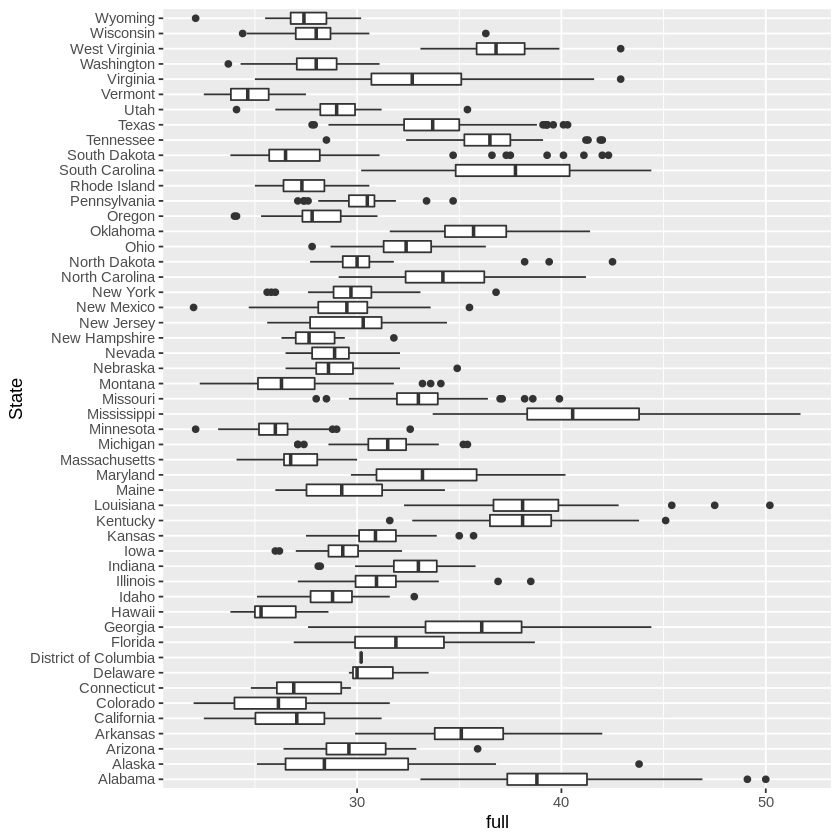

In [ ]:
ggplot(temp, aes(x=full, y=State), ) +geom_boxplot()


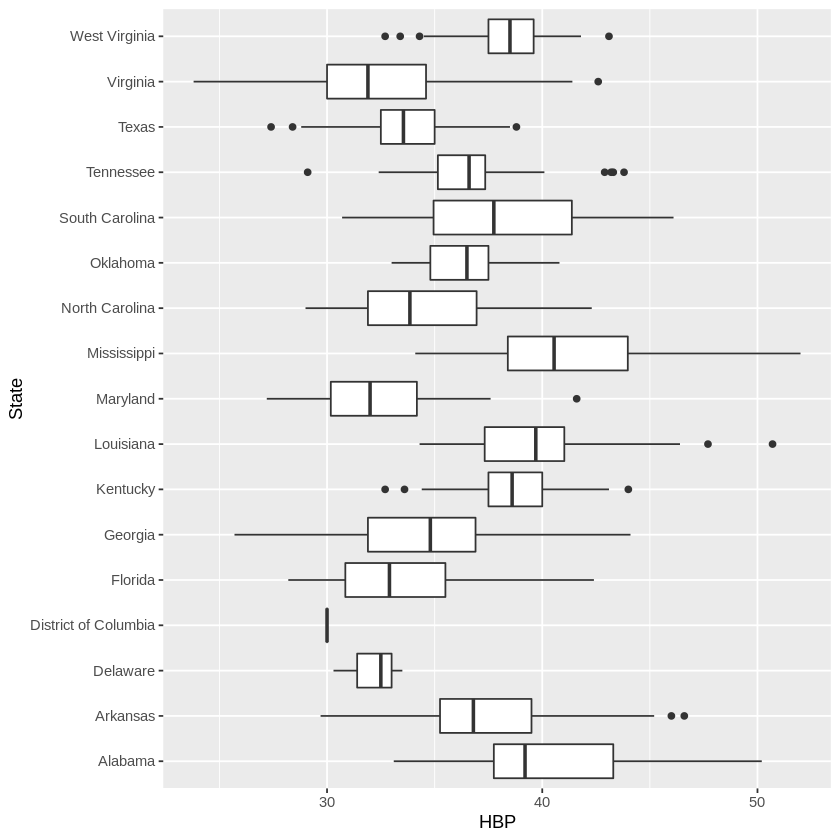

In [ ]:
ggplot(south_region, aes(x=HBP, y=State), ) +
  geom_boxplot()

# Conclusion

Overall, high blood pressure is a disease that has affected millions in the US and worldwide. Some groups, like Hispanic blacks, are more susceptible to the disease than others. However, there are some healthy lifestyle changes that one can practice to reduce the chances of developing high blood pressure. Further, do not rely on a healthy diet and lifestyle changes only, it is important to consult a doctor when required. Consulting a doctor and getting medication at the early stage of Hypertension can reduce the chances of making the situation worst for ourselves. We also concluded from Hypothesis testing that Obesity is equally fatal in Mississippi as compared to High Blood Pressure.

 

 

<br>

 

 

In the future, it would be interesting to further analyze the differentiators of the Western Region in the US as compared to the rest parts. Is this low statistical data of HBP due to healthy diet choices? Regular exercise? Healthy lifestyle decisions? If students, or researchers, could replicate the exact reason or series of researches for this clear difference in the Western region. This analysis can help us to understand how we can improve the situation of High Blood Pressure in other parts of the United State as well as other countries facing the same issues.

# Citations



**Works Cited**


[1] Association, A. H. (Nov 30, 2017),"The Facts About High Blood Pressure", https://www.heart.org/en/health-topics/high-blood-pressure/the-facts-about-high-blood-pressure

<br>

[2] Harvard Health Survey. (October, 2020),"High Blood Pressure (Hypertension)", https://www.health.harvard.edu/a_to_z/high-blood-pressure-hypertension-a-to-z

<br>

[3] Centers for Disease Control and Prevention, U. D.,Facts about Hypertension in United States",https://www.cdc.gov/bloodpressure/facts.htm

<br>

[4] Shepard, B. (September 09, 2020 ),"Study shows high blood pressure awareness and control are declining in America", https://www.uab.edu/news/research/item/11543-study-shows-high-blood-pressure-awareness-and-control-are-declining-in-america#:~:text=Among%20U.S.%20adults%20who%20were,88%20percent%20in%202017%2D2018.

<br>

[5] McCoy, K.(March 2, 2021),"7 Ways to prevent Hypertension", Everyday Health Group, https://www.everydayhealth.com/hypertension/preventing.aspx

<br>

[6] CDC, American Health Association,(Nov 30, 2017),"High blood pressure is a “silent killer”, https://www.heart.org/en/health-topics/high-blood-pressure/why-high-blood-pressure-is-a-silent-killer

<br>

[7] Yechiam Ostchega, P. R. (April 2020),"Hypertension Prevalence Among Adults Aged 18 and Over: United States, 2017–2018",https://www.cdc.gov/nchs/products/databriefs/db364.htm

<br>

[8] Lackland, Daniel T.(Aug 2014),“Racial Differences in Hypertension: Implications for High Blood Pressure Management.”, www.ncbi.nlm.nih.gov/pmc/articles/PMC4108512

<br>

[9] Robert wood Johnson Foundation, State of childhood obesity (2019), "Hypertension in the United States",https://stateofchildhoodobesity.org/hypertension/

<br>

[10] Mayo Foundation for Medical Education and Research (MFMER),"High blood pressure (hypertension)",https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/diagnosis-treatment/drc-20373417

<br>

[11] Medical New Today (August 15, 2018 ),"New 'triple pill' could eliminate high blood pressure",https://www.medicalnewstoday.com/articles/322781

<br>

[12] Meredith Goodwin, Jill Seladi-Schulman, Ph.D.(August 6, 2020),"What to Know About COVID-19 and High Blood Pressure",https://www.healthline.com/health/what-to-know-about-covid-19-and-high-blood-pressure

<br>

[13] WebMD LLC, Brunilda Nazario, MD (December 13, 2020),"Coronavirus and High Blood Pressure: What’s the Link?",https://www.webmd.com/lung/coronavirus-high-blood-pressure#1 

<br>

[14]  Foundation, U. H. (2020)." America's Health Rankings", https://www.americashealthrankings.org/explore/annual/measure/High_Chol/state/MS

<br>

**Note** : All the citations follows APA formatting.





---


---


